<a href="https://colab.research.google.com/github/michaelcalvinwood/ml-base-models/blob/main/Multi_Feature_Regression_Kaggle_Medical_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Data

In [43]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/michaelcalvinwood/ml-datasets/main/multi-feature-regression/kaggle-medical-costs/kaggle-medical-costs.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Clean the Data

### Drop na

In [44]:
df = df.dropna() # remove any with missing values
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Separate the Features and Labels

In [45]:
X = df.drop("charges", axis=1) # Features: Remove the charges column as it's the label
y = df["charges"] # Labels

X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


## Normalize the Data

In [46]:
X.loc[0] # Panda way of getting a row

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [47]:
# Data after
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # scale all numerical columns that have values outside 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region']) # use one-hot encoding for all categorical columns
)
ct.fit(X)
X_normalized = ct.transform(X)
X_normalized[0] # Features are now a normalized numpy array


array([0.02173913, 0.3212268 , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        ])

## Split the Data

In [48]:
# Create the test/train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state = 42)
X_train[0], y_train[0]

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 16884.924)

## Analyze the Data

In [49]:
X_train.shape

(1070, 11)

## Create the Model

In [50]:
import tensorflow as tf
tf.random.set_seed = 42

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

history = model.fit(X_train, y_train, epochs=200, verbose=0)

##Analyze Model Performance

In [51]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.0715 - mae: 3167.0715


[3167.071533203125, 3167.071533203125]

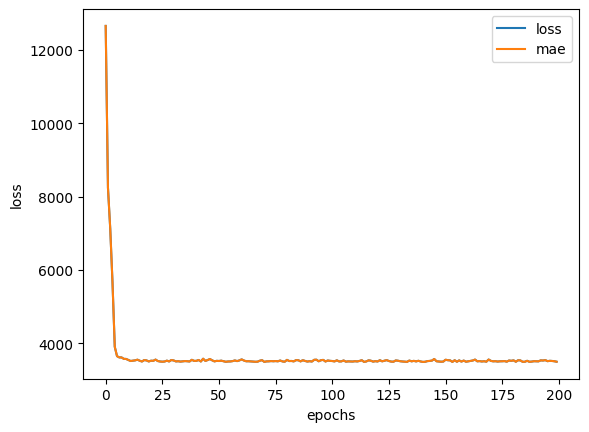

In [52]:
import matplotlib.pyplot as plt

# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Try a larger model

In [66]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

history_2 = model_2.fit(X_train, y_train, epochs=200, verbose=0)

## Compare models

In [54]:
model.evaluate(X_test, y_test)


9/9 [==============================] - 0s 3ms/step - loss: 3165.3374 - mae: 3165.3374


[3165.33740234375, 3165.33740234375]

In [68]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.1448 - mae: 3161.1448


[3161.144775390625, 3161.144775390625]

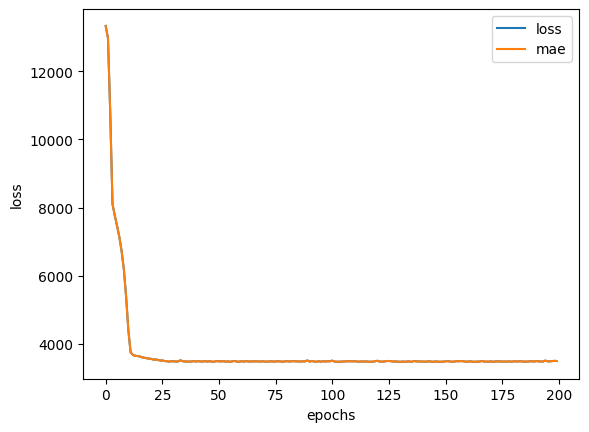

In [67]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Try another model

In [61]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

history_3 = model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 12618.4678 - mae: 12618.4678
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 8442.8105 - mae: 8442.8105
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7214.4741 - mae: 7214.4741
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 5902.7119 - mae: 5902.7119
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 4116.8345 - mae: 4116.8345
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 3652.8049 - mae: 3652.8049
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3587.7285 - mae: 3587.7285
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 3594.7795 - mae: 3594.7795
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 3577.2849 - mae: 3577.2849
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3548.9622 - mae: 3548.96

## Compare Models


In [62]:
model_3.evaluate(X_test, y_test)


9/9 [==============================] - 0s 3ms/step - loss: 3210.3027 - mae: 3210.3027


[3210.302734375, 3210.302734375]

In [59]:
model.evaluate(X_test, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 3170.7363 - mae: 3170.7363


[3170.736328125, 3170.736328125]